# ECE475 Frequentist Machine Learning Project 1
Hailey Hayoon Chung

In [104]:
import pandas as pd
import numpy as np
import os 

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

# 0. Data Handling
Downloaded prostate.data as a txt file. Opened with Microsoft Excel to convert into a csv file. Saved in a pandas dataframe.

In [105]:
# importing prostate.csv into df
filename = os.path.join(os.getcwd(),"prostate.csv")
df = pd.read_csv(filename,index_col=0)
df.drop(columns='train',inplace=True)

pred_list = list(['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45'])
y = df['lpsa']
X = df[pred_list]

Split the dataset into train (80%) and temp (20%). Then temp was split into validation (10%) and test (10%) using test_size = 0.5. Standardizing the predictors to have unit variance (Z = (x-mu)/sigma). Training dataset's mu and sigma will be used to standardize the validation and test datasets.

In [106]:
# a function to split the dataset into train, val, and test
def train_val_test_split(X,y,test_size,seed):
    X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size =test_size, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=test_size, random_state=seed)
    X_train_std = (X_train-X_train.mean())/(X_train.std())
    X_val_std = (X_val-X_train.mean())/(X_train.std())
    X_test_std = (X_test-X_train.mean())/(X_train.std())
    y_train_std = (y_train-y_train.mean())/(y_train.std())
    y_val_std = (y_val-y_train.mean())/(y_train.std())
    y_test_std = (y_test-y_train.mean())/(y_train.std())

    return X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std

# split the prostate data
X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std = train_val_test_split(X,y,0.2,723)

#1. Regression

Plain old linear regression, with no regularization. You must code this one by hand (i.e use equation 3.6 to find the betas).  Report the mean squared error on the test dataset. Replicate tables 3.1 and 3.2. You will not need the validation set for this part of the assignment.



Replicating Tables 3.1 and 3.2 based on the textbook's training dataset

In [107]:
# Table 3.1

df_txt = pd.read_csv(filename,index_col=0)

# select the textbook's training data set
train = df_txt['train']=='T'

# drop 'lpsa' and 'train'
df_txt_train = df_txt[train]
df_dropped = df_txt_train[train].drop(columns=['lpsa','train'],inplace=False)

# Normalizing dataset
dnorm = (df_dropped-df_dropped.mean())/(df_dropped.std())

# figure 3.1
dnorm.corr()

/var/folders/zl/fxd66b555m5656g3sfpymcbr0000gn/T/ipykernel_22537/3714450893.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dropped = df_txt_train[train].drop(columns=['lpsa','train'],inplace=False)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


Replicating Tables 3.1 and 3.2 using 80% train, 10% validation, 10% test

In [108]:
# Table 3.1 - Correlations of predictors in the prostate cancer data
# X_train_std is the standardized features without the intercept column
(X_train_std).corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.330887,0.253054,0.020984,0.524273,0.660119,0.460456,0.406284
lweight,0.330887,1.000000,0.398339,0.512871,0.150092,0.188365,0.090880,0.116662
age,0.253054,0.398339,1.000000,0.367311,0.145991,0.168915,0.289043,0.317806
lbph,0.020984,0.512871,0.367311,1.000000,-0.110736,0.030305,0.052415,0.064306
svi,0.524273,0.150092,0.145991,-0.110736,1.000000,0.658208,0.328532,0.366586
lcp,0.660119,0.188365,0.168915,0.030305,0.658208,1.000000,0.542650,0.643739
gleason,0.460456,0.090880,0.289043,0.052415,0.328532,0.542650,1.000000,0.787130
pgg45,0.406284,0.116662,0.317806,0.064306,0.366586,0.643739,0.787130,1.000000


In [109]:
X_train_std.insert(0,"Intercept",np.ones((len(X_train_std),1)),allow_duplicates=False)

# Now X_train_std has the intercept column of ones

In [110]:
Xt = np.array(X_train_std.transpose())
Xarr = np.array(X_train_std)
yarr = np.array(y_train)
inv = np.linalg.inv(Xt@Xarr)
beta_h = inv@Xt@yarr

# Calculating the standard error
var = np.sum((yarr-(Xarr@beta_h))**2)/(Xarr.shape[0]-Xarr.shape[1])
v= np.diag(inv)
stderr = np.sqrt(var) * np.sqrt(v)

# Calculating the Z Score 
zscore = beta_h / stderr

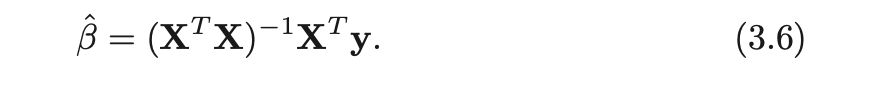

In [111]:
# Table 3.2
#no dot products-- do matrix multiplication

col_names = list(X_train_std.columns)
col_names
d = {'Coefficient': beta_h, 'Std. Error': stderr, 'Z Score': zscore}
t32 = pd.DataFrame(data=d,index=col_names)
t32.round(5)

,Coefficient,Std. Error,Z Score
Intercept,2.44021,0.07989,30.54631
lcavol,0.69596,0.11940,5.82871
lweight,0.22552,0.10435,2.16105
age,-0.13627,0.09619,-1.41668
lbph,0.11258,0.10075,1.11739
svi,0.31819,0.11147,2.85448
lcp,-0.11387,0.14819,-0.76839
gleason,0.00408,0.13603,0.03001
pgg45,0.11875,0.15001,0.79166


In [112]:
# Predicted values using equation (3.7)
betas = beta_h[1:]
y_pred_h = X_test_std@betas

# Mean Squared Error (predicted vs test)
mse = np.mean((y_test_std-y_pred_h)**2)
print("MSE on the test dataset = ",mse)

MSE on the test dataset =  0.3506687673697835


# 2. Ridge Regression
You must also code this one by hand (eq 3.44 to find the betas). Select the optimal value of Lambda by cross-validation using the validation dataset. Report the mean squared error on the test dataset, using the best lambda you found on the validation set. DO NOT USE THE TEST DATASET TO CHOOSE LAMBDA. Plot a ridge plot similar to figure 3.8, but you can just sweep the lambda parameter (you don't have to scale it to degrees of freedom).

In [113]:
# "intercept has been left out of the penalty term" pg.64
X_train_std.drop(columns='Intercept', inplace=True)
Xarr = np.array(X_train_std)
Xt = np.array(X_train_std.transpose())
yarr = np.array(y_train)

# "I is the pxp identity matrix"
p = len(X_train_std.columns)
I = np.identity(p)

In [114]:
# an empty list to store the coefficients
bridge = []
# an empty list to store mse values
mse_ridge = []

# sweeping the lambda parameter
lmda = np.linspace(0,50,1000)

for i in range(0,len(lmda)):
    # sweeping through lmda and storing individual coeffs in a list
    beta_ridge = np.linalg.inv(((Xt@Xarr)+ (lmda[i]*I)))@(Xt)@(yarr)
    bridge.append(beta_ridge)

    # using betas on the validation set
    y_ridge_val = X_val_std@beta_ridge
    # calculating mse for each lmda
    mse_ridge.append(np.mean((y_val_std-y_ridge_val)**2))

# finding the index of minimum from mse_ridge
min_mse_index = np.argmin(mse_ridge)
lmda_best = lmda[min_mse_index]

# report mse on the test dataset using the best lambda
beta_ridge_best = np.linalg.inv(((Xt@Xarr)+ (lmda_best*I)))@(Xt)@(yarr)
y_ridge_test = (np.array(X_test_std))@beta_ridge_best
mse_ridge_best = np.mean((y_test_std-y_ridge_test)**2)

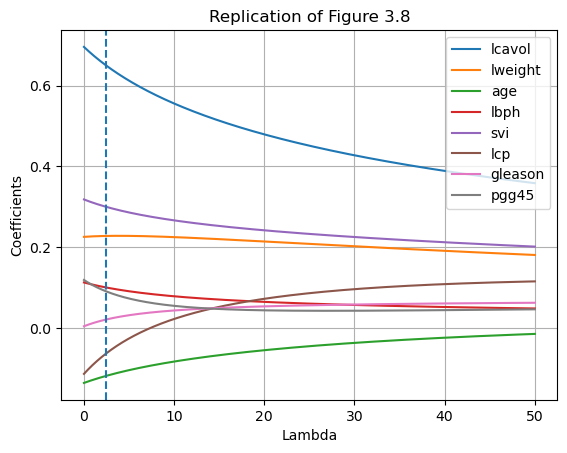

Optimal value of Lambda selected from validation dataset =  2.4524524524524525
MSE on the test dataset =  0.33005263660753775


In [115]:
fig, ax = plt.subplots()
#ax.axis('equal')
ax.plot(lmda, bridge)
ax.axvline(x=lmda_best, label='Optimal Lambda',linestyle='dashed')
ax.set(xlabel='Lambda', ylabel='Coefficients',title='Replication of Figure 3.8')
ax.grid()
ax.legend(pred_list)
plt.show()
print("Optimal value of Lambda selected from validation dataset = ", lmda_best)
print("MSE on the test dataset = ", mse_ridge_best)
# The figure is 'flipped' and I think it's correct to be flipped since we're plotting against lambda instead of df(lambda)?

#3. Lasso Regression
Use the built in packages in sci-kit learn or MATLAB to do a Lasso regression. Select the optimal value of lambda as in part b) and also display a Lasso plot similar to figure 3.10, but again you can just sweep the lambda parameter.

In [116]:
# Creating a Lasso object
model_lasso = Lasso()

# sweeping the alpha parameter (alpha = lambda)
lmda = np.linspace(0.0001,1,1000)

# an empty list to store the coefficients
blasso = []
# an empty list to store mse values
mse_lasso = []

# sweeping through lmda and storing individual coeffs in a list
for i in range(0,len(lmda)):
    # creating the lasso model
    model_lasso = Lasso(alpha=lmda[i])
    # fitting the lasso model with training dataset
    model_lasso.fit(X_train_std, y_train_std)
    blasso.append(model_lasso.coef_)
    # predicting y from X
    y_lasso_val = model_lasso.predict(X_val_std)
    # calculating MSE
    mse_lasso.append(np.mean((y_val_std-y_lasso_val)**2))
    
# finding the index of minimum from mse_lasso
min_mse_index_lasso = np.argmin(mse_lasso)
lmda_best_lasso = lmda[min_mse_index_lasso]

# report mse on the test dataset using the best lambda
beta_lasso_best = blasso[min_mse_index_lasso]
y_lasso_test = (np.array(X_test_std))@beta_lasso_best
mse_lasso_best = np.mean((y_test_std-y_lasso_test)**2)


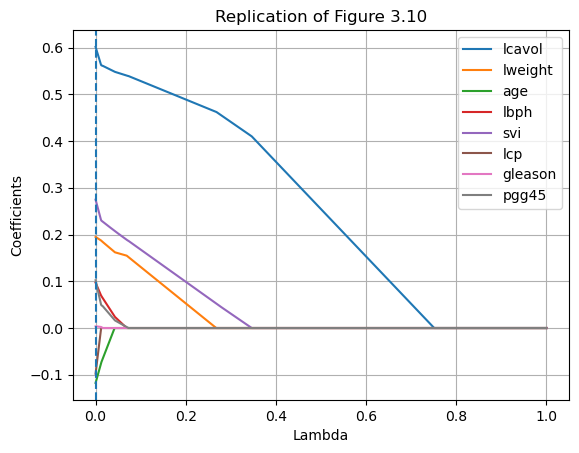

Optimal value of Lambda selected from validation dataset =  0.0001
MSE on test dataset =  0.2682719092769593


In [117]:
# Replication of Figure 3.10
fig, ax = plt.subplots()
#ax.axis('equal')
ax.plot(lmda, blasso)
ax.axvline(x=lmda_best_lasso, label='Optimal Lambda=alpha',linestyle='dashed')
ax.set(xlabel='Lambda', ylabel='Coefficients',title='Replication of Figure 3.10')
ax.grid()
ax.legend(pred_list)
plt.show()
print("Optimal value of Lambda selected from validation dataset = ", lmda_best_lasso)
print("MSE on test dataset = ", mse_lasso_best)

In [118]:
print("Linear Regression MSE = ", mse)
print("Ridge Regression MSE = ", mse_ridge_best)
print("Lasso Regression MSE = ", mse_lasso_best)

Linear Regression MSE =  0.3506687673697835
Ridge Regression MSE =  0.33005263660753775
Lasso Regression MSE =  0.2682719092769593


# 4. Application on Synchronus Machine Data Set

Next, download a dataset suitable for linear regression from UCI or another repository. For now, this should be a dataset that only has numerical features, with no missing values. Repeat the analysis above on this dataset.

Which features did the Lasso select for you to include in your model? Do these features make sense?
Compute the MSE on the training dataset and the test dataset for all methods and comment on the results.  Compare this MSE to a baseline MSE.

Synchronus Machine Data Set:  Synchronous motors (SMs) are AC motors with constant speed.A SM dataset is obtained from a real experimental set. The task is to create the strong models to estimate the excitation current of SM.  
Iy (Load Current)  PF (Power factor)  e (Power factor error)  dIf (Changing of excitation current of synchronous machine)  If (Excitation current of synchronous machine)

In [119]:
filename = os.path.join(os.getcwd(),"sync.csv")
df2 = pd.read_csv(filename)

y = df2['Iy']
predlist = list(['PF','e','dIf','If'])
X = df2[predlist]

X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std = train_val_test_split(X,y,0.2,723)

Linear Regression for Synchronus Machine Dataset

In [120]:
# Replicating Table 3.2
display((df2).corr())

,Iy,PF,e,dIf,If
Iy,1.000000,-0.041574,0.041574,0.366052,0.424945
PF,-0.041574,1.000000,-1.000000,-0.702533,-0.861013
e,0.041574,-1.000000,1.000000,0.702533,0.861013
dIf,0.366052,-0.702533,0.702533,1.000000,0.830651
If,0.424945,-0.861013,0.861013,0.830651,1.000000


In [121]:
# Inserting the column of ones to get the intercept
X_train_std.insert(0,"Intercept",np.ones((len(X_train_std),1)),allow_duplicates=False)

In [122]:
Xt = np.array(X_train_std.transpose())
Xarr = np.array(X_train_std)
yarr = np.array(y_train)
inv = np.linalg.inv(Xt@Xarr)
beta_h = inv@Xt@yarr

# Calculating the standard error
var = np.sum((yarr-(Xarr@beta_h))**2)/(Xarr.shape[0]-Xarr.shape[1])
v= np.diag(inv)
stderr = np.sqrt(var) * np.sqrt(v)

# Calculating the Z Score 
zscore = beta_h / stderr

# Table 3.2
#no dot products-- do matrix multiplication

col_names = list(X_train_std.columns)
col_names
d = {'Coefficient': beta_h, 'Std. Error': stderr, 'Z Score': zscore}
t32 = pd.DataFrame(data=d,index=col_names)
display(t32)

print("The Std. Error for PF and e are very very small, which means that Z score tends to positive infinity")

# Predicted values using equation (3.7)
betas = beta_h[1:]
y_pred_h = X_test_std@betas

# MSE on test dataset
mse = np.mean((y_test_std-y_pred_h)**2)

# MSE on train dataset
y_pred_train = (X_train_std.drop(columns='Intercept',inplace=False))@betas
mse_linear_train = np.mean((y_train_std[1:]-y_pred_train)**2)
print("MSE on the test dataset = ",mse)

# Baseline MSE on test:
baseline_mse = np.mean((y_test_std-y_train_std.mean())**2)

/var/folders/zl/fxd66b555m5656g3sfpymcbr0000gn/T/ipykernel_22537/2125603474.py:10: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(var) * np.sqrt(v)


,Coefficient,Std. Error,Z Score
Intercept,4.502472,0.027422,164.192889
PF,0.318266,NaN,NaN
e,-0.861286,NaN,NaN
dIf,-0.003256,0.047695,-0.068272
If,1.359594,0.068048,19.979995


The Std. Error for PF and e are very very small, which means that Z score tends to positive infinity
MSE on the test dataset =  0.5042189841879585


Ridge Regression for Synchronus Machine Dataset

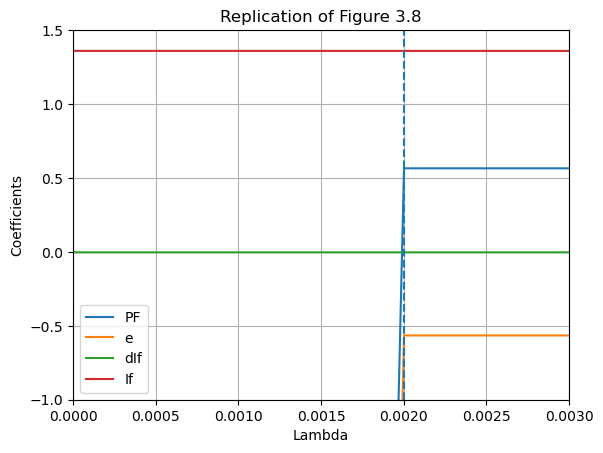

Optimal value of Lambda selected from validation dataset =  0.002002002002002002
MSE on the test dataset =  0.5101110643473902


In [123]:
# "intercept has been left out of the penalty term" pg.64
X_train_std.drop(columns='Intercept', inplace=True)
Xarr = np.array(X_train_std)
Xt = np.array(X_train_std.transpose())
yarr = np.array(y_train)

# "I is the pxp identity matrix"
p = len(X_train_std.columns)
I = np.identity(p)

# an empty list to store the coefficients
bridge = []
# an empty list to store mse values
mse_ridge = []

# sweeping the lambda parameter
lmda = np.linspace(0,2,1000)

for i in range(0,len(lmda)):
    # sweeping through lmda and storing individual coeffs in a list
    beta_ridge = np.linalg.inv(((Xt@Xarr)+ (lmda[i]*I)))@(Xt)@(yarr)
    bridge.append(beta_ridge)

    # using betas on the validation set
    y_ridge_val = X_val_std@beta_ridge
    # calculating mse for each lmda
    mse_ridge.append(np.mean((y_val_std-y_ridge_val)**2))

# finding the index of minimum from mse_ridge
min_mse_index = np.argmin(mse_ridge)
lmda_best = lmda[min_mse_index]

# report mse on the test dataset using the best lambda
beta_ridge_best = np.linalg.inv(((Xt@Xarr)+ (lmda_best*I)))@(Xt)@(yarr)
y_ridge_test = (np.array(X_test_std))@beta_ridge_best
mse_ridge_best = np.mean((y_test_std-y_ridge_test)**2)

# report mse on the train dataset
y_ridge_train = (np.array(X_train_std))@beta_ridge_best
mse_ridge_train = np.mean((y_train_std-y_ridge_train)**2)

fig, ax = plt.subplots()
#ax.axis('equal')
ax.plot(lmda, bridge)
ax.axvline(x=lmda_best, label='Optimal Lambda',linestyle='dashed')
ax.set(xlabel='Lambda', ylabel='Coefficients',title='Replication of Figure 3.8')
ax.grid()
ax.set_ylim([-1.0,1.5])
ax.set_xlim([0,0.003])
ax.legend(predlist)
plt.show()
print("Optimal value of Lambda selected from validation dataset = ", lmda_best)
print("MSE on the test dataset = ", mse_ridge_best)

Lasso Regression for the synchronus machine data set

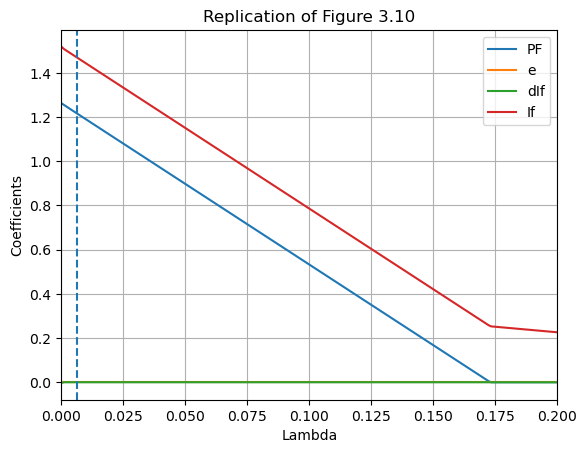

Optimal value of Lambda selected from Validation dataset=  0.006105405405405406
MSE on test dataset =  0.5087900626281272


In [124]:
# Creating a Lasso object
model_lasso = Lasso()

# sweeping the alpha parameter (alpha = lambda)
lmda = np.linspace(0.0001,1,1000)

# an empty list to store the coefficients
blasso = []
# an empty list to store mse values
mse_lasso = []

# sweeping through lmda and storing individual coeffs in a list
for i in range(0,len(lmda)):
    # creating the lasso model
    model_lasso = Lasso(alpha=lmda[i])
    # fitting the lasso model with training dataset
    model_lasso.fit(X_train_std, y_train_std)
    blasso.append(model_lasso.coef_)
    # predicting y from X
    y_lasso_val = model_lasso.predict(X_val_std)
    # calculating MSE
    mse_lasso.append(np.mean((y_val_std-y_lasso_val)**2))


# finding the index of minimum from mse_lasso
min_mse_index_lasso = np.argmin(mse_lasso)
lmda_best_lasso = lmda[min_mse_index_lasso]

# report mse on the test dataset using the best lambda
beta_lasso_best = blasso[min_mse_index_lasso]
y_lasso_test = (np.array(X_test_std))@beta_lasso_best
mse_lasso_best = np.mean((y_test_std-y_lasso_test)**2)

# report mse on the train dataset
y_lasso_train = (np.array(X_train_std))@beta_lasso_best
mse_lasso_train = np.mean((y_train_std-y_lasso_train)**2)

# Replication of Figure 3.10
fig, ax = plt.subplots()
#ax.axis('equal')
ax.plot(lmda, blasso)
ax.axvline(x=lmda_best_lasso, label='Optimal Lambda=alpha',linestyle='dashed')
ax.set(xlabel='Lambda', ylabel='Coefficients',title='Replication of Figure 3.10')
ax.grid()
ax.legend(predlist)
ax.set_xlim([0.0,0.2])
plt.show()
print("Optimal value of Lambda selected from Validation dataset= ", lmda_best_lasso)
print("MSE on test dataset = ", mse_lasso_best)

In [125]:
print("Linear Regression MSE = ", mse)
print("Ridge Regression MSE = ", mse_ridge_best)
print("Lasso Regression MSE = ", mse_lasso_best)

mse_test = [mse, mse_ridge_best, mse_lasso_best]
mse_train = [mse_linear_train, mse_ridge_train, mse_lasso_train]

indexlist = list(['Linear Regression', 'Ridge Regression', 'Lasso Regression'])
d = {'MSE on Train': mse_train, 'MSE on Test': mse_test}
msetable = pd.DataFrame(data=d,index=indexlist)
display(msetable)
print("Baseline MSE = ", baseline_mse)

Linear Regression MSE =  0.5042189841879585
Ridge Regression MSE =  0.5101110643473902
Lasso Regression MSE =  0.5087900626281272


,MSE on Train,MSE on Test
Linear Regression,0.419459,0.504219
Ridge Regression,0.416134,0.510111
Lasso Regression,0.410246,0.508790


Baseline MSE =  0.9707499066036006


The optimal value of lambda selected from the validation dataset by a lasso regression fit is 0.006105405... At this value of lambda, only the features lf and PF have meaningful coefficients. This means that these are the features selected by Lasso to include in my model. However, I am not entirely sure if these features make sense (don't really know about the technical features of a synchronous machine). 

MSE indicates how close the predictions were to the actual values. The MSE on training dataset is the smaller than that on the test set, which are both significantly lower than the baseline MSE (calculated by comparing the test value to the mean of train values). This indicates that our models did indeed predict something meaningful; the error is lower than just taking the mean values. 

# Stretch Goal (2 points)
Add nonlinear and interaction terms to your dataset and try to improve the performance. Are you able to do so?

# Adding Nonlinear Terms

In [126]:
df_sg = df.copy()
df_sg["pgg45exp"] = np.exp(df_sg["pgg45"])
X = df_sg.drop(columns = ['pgg45', 'lpsa'], inplace = False)
y = df_sg['lpsa']

In [127]:
# split the prostate data
X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std = train_val_test_split(X,y,0.2,723)

# inserting an intercept column
X_train_std.insert(0,"Intercept",np.ones((len(X_train_std),1)),allow_duplicates=False)

Xt = np.array(X_train_std.transpose())
Xarr = np.array(X_train_std)
yarr = np.array(y_train)
inv = np.linalg.inv(Xt@Xarr)
beta_h = inv@Xt@yarr

# Calculating the standard error
var = np.sum((yarr-(Xarr@beta_h))**2)/(Xarr.shape[0]-Xarr.shape[1])
v= np.diag(inv)
stderr = np.sqrt(var) * np.sqrt(v)

# Calculating the Z Score 
zscore = beta_h / stderr

# Predicted values using equation (3.7)
betas = beta_h[1:]
y_pred_h = X_test_std@betas

# MSE on test dataset
mse = np.mean((y_test_std-y_pred_h)**2)

# MSE on train dataset
y_pred_train = (X_train_std.drop(columns='Intercept',inplace=False))@betas
mse_linear_train = np.mean((y_train_std[1:]-y_pred_train)**2)

# Baseline MSE on test:
baseline_mse = np.mean((y_test_std-y_train_std.mean())**2)

In [128]:
# "intercept has been left out of the penalty term" pg.64
X_train_std.drop(columns='Intercept', inplace=True)
Xarr = np.array(X_train_std)
Xt = np.array(X_train_std.transpose())
yarr = np.array(y_train)

# "I is the pxp identity matrix"
p = len(X_train_std.columns)
I = np.identity(p)

# an empty list to store the coefficients
bridge = []
# an empty list to store mse values
mse_ridge = []

# sweeping the lambda parameter
lmda = np.linspace(0,2,1000)

for i in range(0,len(lmda)):
    # sweeping through lmda and storing individual coeffs in a list
    beta_ridge = np.linalg.inv(((Xt@Xarr)+ (lmda[i]*I)))@(Xt)@(yarr)
    bridge.append(beta_ridge)

    # using betas on the validation set
    y_ridge_val = X_val_std@beta_ridge
    # calculating mse for each lmda
    mse_ridge.append(np.mean((y_val_std-y_ridge_val)**2))

# finding the index of minimum from mse_ridge
min_mse_index = np.argmin(mse_ridge)
lmda_best = lmda[min_mse_index]

# report mse on the test dataset using the best lambda
beta_ridge_best = np.linalg.inv(((Xt@Xarr)+ (lmda_best*I)))@(Xt)@(yarr)
y_ridge_test = (np.array(X_test_std))@beta_ridge_best
mse_ridge_best = np.mean((y_test_std-y_ridge_test)**2)

# report mse on the train dataset
y_ridge_train = (np.array(X_train_std))@beta_ridge_best
mse_ridge_train = np.mean((y_train_std-y_ridge_train)**2)

In [129]:
# Creating a Lasso object
model_lasso = Lasso()

# sweeping the alpha parameter (alpha = lambda)
lmda = np.linspace(0.0001,1,1000)

# an empty list to store the coefficients
blasso = []
# an empty list to store mse values
mse_lasso = []

# sweeping through lmda and storing individual coeffs in a list
for i in range(0,len(lmda)):
    # creating the lasso model
    model_lasso = Lasso(alpha=lmda[i])
    # fitting the lasso model with training dataset
    model_lasso.fit(X_train_std, y_train_std)
    blasso.append(model_lasso.coef_)
    # predicting y from X
    y_lasso_val = model_lasso.predict(X_val_std)
    # calculating MSE
    mse_lasso.append(np.mean((y_val_std-y_lasso_val)**2))


# finding the index of minimum from mse_lasso
min_mse_index_lasso = np.argmin(mse_lasso)
lmda_best_lasso = lmda[min_mse_index_lasso]

# report mse on the test dataset using the best lambda
beta_lasso_best = blasso[min_mse_index_lasso]
y_lasso_test = (np.array(X_test_std))@beta_lasso_best
mse_lasso_best = np.mean((y_test_std-y_lasso_test)**2)

# report mse on the train dataset
y_lasso_train = (np.array(X_train_std))@beta_lasso_best
mse_lasso_train = np.mean((y_train_std-y_lasso_train)**2)

In [130]:
print("Linear Regression MSE = ", mse)
print("Ridge Regression MSE = ", mse_ridge_best)
print("Lasso Regression MSE = ", mse_lasso_best)

mse_test = [mse, mse_ridge_best, mse_lasso_best]
mse_train = [mse_linear_train, mse_ridge_train, mse_lasso_train]

indexlist = list(['Linear Regression', 'Ridge Regression', 'Lasso Regression'])
d = {'MSE on Train': mse_train, 'MSE on Test': mse_test}
msetable = pd.DataFrame(data=d,index=indexlist)
display(msetable)
print("Baseline MSE = ", baseline_mse)

Linear Regression MSE =  0.3503669442452541
Ridge Regression MSE =  0.3503669442452527
Lasso Regression MSE =  0.2655616206843504


,MSE on Train,MSE on Test
Linear Regression,0.319496,0.350367
Ridge Regression,0.319252,0.350367
Lasso Regression,0.302413,0.265562


Baseline MSE =  0.2118840801391697


For adding non linear terms, I first tried with using an exponential function to each of the linear terms. Using trial and error, I found that using an exponential function on the term "pgg45" reduces the MSE values on linear and lasso.

# Adding Interactive Terms

In [131]:
df.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

In [132]:
df_it = df.copy()
df_it["multiply"] = df_it["lcavol"] * df_it["lbph"]
X = df_it.drop(columns = ['lpsa'], inplace = False)
y = df_it['lpsa']

In [133]:
# split the prostate data
X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std = train_val_test_split(X,y,0.2,723)

# inserting an intercept column
X_train_std.insert(0,"Intercept",np.ones((len(X_train_std),1)),allow_duplicates=False)

Xt = np.array(X_train_std.transpose())
Xarr = np.array(X_train_std)
yarr = np.array(y_train)
inv = np.linalg.inv(Xt@Xarr)
beta_h = inv@Xt@yarr

# Calculating the standard error
var = np.sum((yarr-(Xarr@beta_h))**2)/(Xarr.shape[0]-Xarr.shape[1])
v= np.diag(inv)
stderr = np.sqrt(var) * np.sqrt(v)

# Calculating the Z Score 
zscore = beta_h / stderr

# Predicted values using equation (3.7)
betas = beta_h[1:]
y_pred_h = X_test_std@betas

# MSE on test dataset
mse = np.mean((y_test_std-y_pred_h)**2)

# MSE on train dataset
y_pred_train = (X_train_std.drop(columns='Intercept',inplace=False))@betas
mse_linear_train = np.mean((y_train_std[1:]-y_pred_train)**2)

# Baseline MSE on test:
baseline_mse = np.mean((y_test_std-y_train_std.mean())**2)

In [134]:
# "intercept has been left out of the penalty term" pg.64
X_train_std.drop(columns='Intercept', inplace=True)
Xarr = np.array(X_train_std)
Xt = np.array(X_train_std.transpose())
yarr = np.array(y_train)

# "I is the pxp identity matrix"
p = len(X_train_std.columns)
I = np.identity(p)

# an empty list to store the coefficients
bridge = []
# an empty list to store mse values
mse_ridge = []

# sweeping the lambda parameter
lmda = np.linspace(0,2,1000)

for i in range(0,len(lmda)):
    # sweeping through lmda and storing individual coeffs in a list
    beta_ridge = np.linalg.inv(((Xt@Xarr)+ (lmda[i]*I)))@(Xt)@(yarr)
    bridge.append(beta_ridge)

    # using betas on the validation set
    y_ridge_val = X_val_std@beta_ridge
    # calculating mse for each lmda
    mse_ridge.append(np.mean((y_val_std-y_ridge_val)**2))

# finding the index of minimum from mse_ridge
min_mse_index = np.argmin(mse_ridge)
lmda_best = lmda[min_mse_index]

# report mse on the test dataset using the best lambda
beta_ridge_best = np.linalg.inv(((Xt@Xarr)+ (lmda_best*I)))@(Xt)@(yarr)
y_ridge_test = (np.array(X_test_std))@beta_ridge_best
mse_ridge_best = np.mean((y_test_std-y_ridge_test)**2)

# report mse on the train dataset
y_ridge_train = (np.array(X_train_std))@beta_ridge_best
mse_ridge_train = np.mean((y_train_std-y_ridge_train)**2)

In [135]:
# Creating a Lasso object
model_lasso = Lasso()

# sweeping the alpha parameter (alpha = lambda)
lmda = np.linspace(0.0001,1,1000)

# an empty list to store the coefficients
blasso = []
# an empty list to store mse values
mse_lasso = []

# sweeping through lmda and storing individual coeffs in a list
for i in range(0,len(lmda)):
    # creating the lasso model
    model_lasso = Lasso(alpha=lmda[i])
    # fitting the lasso model with training dataset
    model_lasso.fit(X_train_std, y_train_std)
    blasso.append(model_lasso.coef_)
    # predicting y from X
    y_lasso_val = model_lasso.predict(X_val_std)
    # calculating MSE
    mse_lasso.append(np.mean((y_val_std-y_lasso_val)**2))


# finding the index of minimum from mse_lasso
min_mse_index_lasso = np.argmin(mse_lasso)
lmda_best_lasso = lmda[min_mse_index_lasso]

# report mse on the test dataset using the best lambda
beta_lasso_best = blasso[min_mse_index_lasso]
y_lasso_test = (np.array(X_test_std))@beta_lasso_best
mse_lasso_best = np.mean((y_test_std-y_lasso_test)**2)

# report mse on the train dataset
y_lasso_train = (np.array(X_train_std))@beta_lasso_best
mse_lasso_train = np.mean((y_train_std-y_lasso_train)**2)

In [136]:
print("Linear Regression MSE = ", mse)
print("Ridge Regression MSE = ", mse_ridge_best)
print("Lasso Regression MSE = ", mse_lasso_best)

mse_test = [mse, mse_ridge_best, mse_lasso_best]
mse_train = [mse_linear_train, mse_ridge_train, mse_lasso_train]

indexlist = list(['Linear Regression', 'Ridge Regression', 'Lasso Regression'])
d = {'MSE on Train': mse_train, 'MSE on Test': mse_test}
msetable = pd.DataFrame(data=d,index=indexlist)
display(msetable)
print("Baseline MSE = ", baseline_mse)

Linear Regression MSE =  0.3319115141486332
Ridge Regression MSE =  0.315960136431755
Lasso Regression MSE =  0.2545821483387721


,MSE on Train,MSE on Test
Linear Regression,0.322086,0.331912
Ridge Regression,0.321565,0.315960
Lasso Regression,0.308740,0.254582


Baseline MSE =  0.2118840801391697


After a few trial and error, I figured out that multiplying two columns, "lcavol" and "lbph", to make an interactive term reduces the overall performance; it reduces the MSE values for all three types of regression (Linear, Ridge, and Lasso)